# 스드메(스튜디오, 드레스, 메이크업) 관련 게시물 WordCloud 분석


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

WEDDING_SDM_DATA_PATH = "../data/raw/wedding_sdm_crawl.csv"
STOPWORDS_TXT_PATH = "./config/stopwords-ko.txt"
FONT_PATH = "/System/Library/Fonts/AppleSDGothicNeo.ttc"  # macOS


## 1. 데이터 로드 및 전처리
분석할 텍스트를 조인

In [ ]:
# CSV 로드
df = pd.read_csv(WEDDING_SDM_DATA_PATH)

# 분석할 텍스트 컬럼 선택
# (본문 위주 + 검색 요약도 같이 쓰고 싶으면 concat)
df["combined_text"] = (
    df["search_title"].fillna("") + " " +
    df["search_snippet"].fillna("") + " " +
    df["body_text"].fillna("")
)

all_text = " ".join(df["combined_text"].tolist())
print(f"전체 텍스트 길이: {len(all_text)}")

전체 텍스트 길이: 2926267


## 2. 불용어 제거
기존 한국어 불용어 파일과 추가한 불용어 제거

In [ ]:
# 한글 불용어 로드
with open(STOPWORDS_TXT_PATH, encoding="utf-8") as f:
    korean_stopwords = set(
        line.strip() for line in f if line.strip()
    )

In [4]:
additional_stopwords = {
    # 조사 / 접속
    "그리고", "그래서", "하지만", "또한", "때문에",

    # 대명사
    "저는", "제가", "우리는", "나는", "내가", "저희",

    # 구어체/서술
    "하는", "하는데", "했어요", "합니다", "있어요", "있습니다",
    "되는", "됩니다", "같아요", "같은", "정도", "경우",

    # 감탄/강조
    "정말", "진짜", "너무", "완전", "약간",

    # 시간/과정 표현
    "이후", "이전", "처음", "나중에", "중간에",

    # 일반 후기 관용어
    "후기", "리뷰", "사용", "이용", "선택",
}

In [5]:
stopwords = set(STOPWORDS)
stopwords = stopwords.union(korean_stopwords)
stopwords = stopwords.union(additional_stopwords)

In [6]:
def remove_single_char_korean(text):
    """
    한 글자 한글 토큰 제거
    """
    return re.sub(r"\b[가-힣]\b", "", text)

clean_text = remove_single_char_korean(all_text)

## 3. WordCloud 시각화


In [ ]:
wordcloud = WordCloud(
    font_path=FONT_PATH,
    background_color="white",
    width=1200,
    height=600,
    max_words=200,
    stopwords=stopwords,
    collocations=False   # 단어 쌍 제거 (중요)
).generate(clean_text)

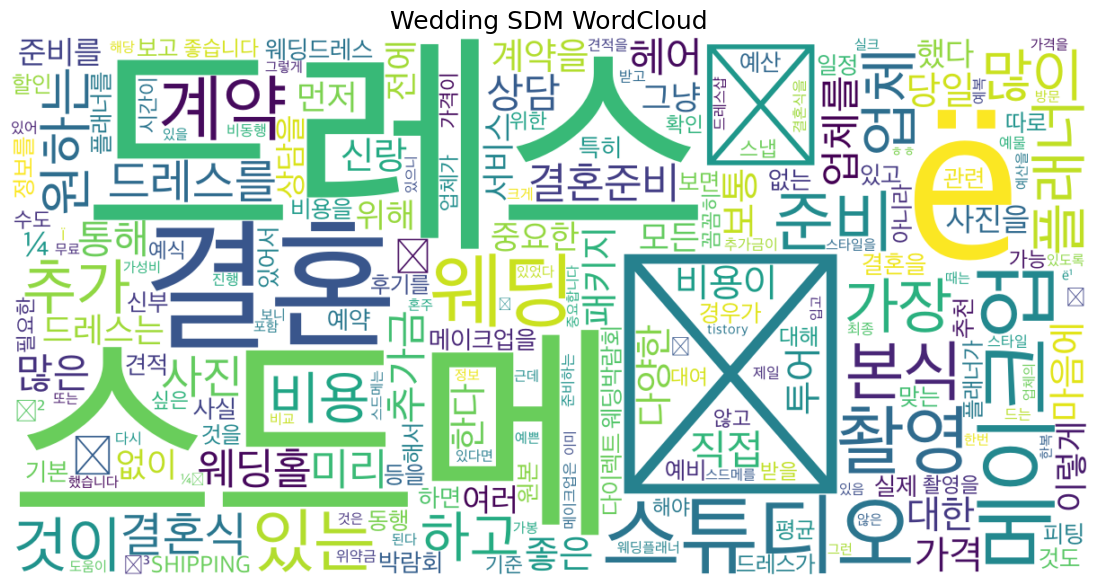

In [8]:
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wedding SDM WordCloud", fontsize=18)
plt.show()